In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import vectice
from vectice import FileDataWrapper


In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/vectice/GettingStarted/main/22.4/tutorial/Data/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [3]:
## Goal of this sample is to simply catalog assets in Vectice

# Connect to Vectice
conn = vectice.connect(
    api_token='gZq7A41al.xxGVXQ0on8JDPA6z2j4r9gZq7A41albEMLdOmvp3kwW7YeRNBy', 
    host='https://app.vectice.com',
    workspace='Samples'
)
# print(conn.projects) # get list of projects
project = conn.project(6720)

2022/12/20 13:15:01 INFO vectice.connection: Vectice successfully connected.
2022/12/20 13:15:05 INFO vectice.connection: 
Last Used Assets
Project: Simple project - Hello World
Phase: Modeling
Iteration: 1402
IterationStep: Build Model
2022/12/20 13:15:05 INFO vectice.connection: Your current workspace: Samples
2022/12/20 13:15:06 INFO vectice.models.workspace: Your current project: 6720


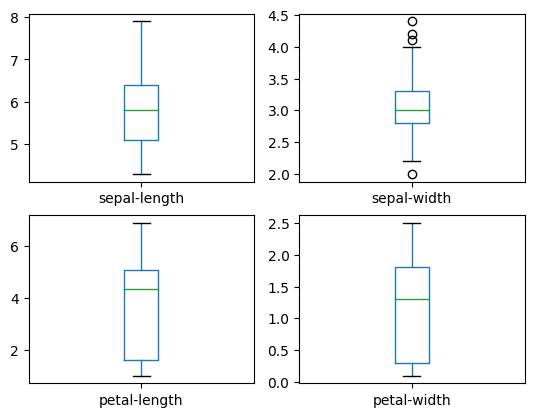

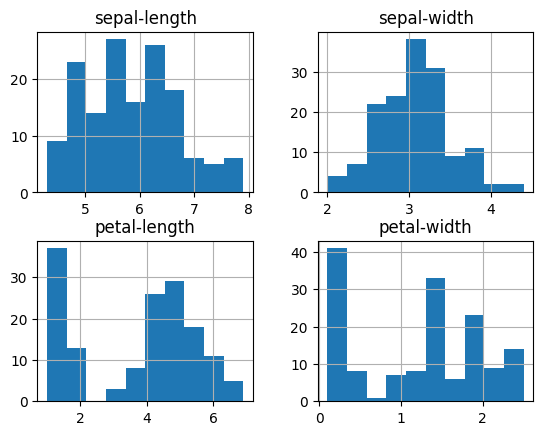

In [6]:
# Plot the dataset
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
boxplot = pyplot.savefig("boxplot.jpg")
pyplot.show()

# histograms
dataset.hist()
histogram = pyplot.savefig("histogram.jpg")
pyplot.show()

In [30]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Build Vectice objs

# Set the origin dataset for the project
project.origin_dataset = FileDataWrapper(path= 'iris.csv', name="Iris Dataset",capture_code=False)

# This dataset is now available for use as a Dataset Asset Widget in Vectice webapp

training_wrapped = vectice.FileDataWrapper(path="iris.csv", name="iteration 2", usage=vectice.DatasetSourceUsage.TRAINING, capture_code=False)
testing_wrapped = vectice.FileDataWrapper(path="iris2.csv", name="iteration 2", usage=vectice.DatasetSourceUsage.TESTING, capture_code=False)
validation_wrapped = vectice.FileDataWrapper(path="iris3.csv", name="iteration 2", usage=vectice.DatasetSourceUsage.VALIDATION, capture_code=False)

# Adding the other datasets
project.origin_dataset = training_wrapped
#iter.modeling_dataset = training_wrapped

2022/12/20 14:19:37 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: iris.csv wrapped successfully.
2022/12/20 14:19:37 INFO vectice.api.client: Successfully registered Dataset(name='Iris Dataset', id=17186, version='Version 2', type=ORIGIN).
2022/12/20 14:19:37 INFO vectice.models.project: Dataset: Iris Dataset with Version: Version 2 already exists.
2022/12/20 14:19:39 INFO vectice.models.project: The step Build Model already has Dataset(name='Iris Dataset', id=17186, version='Version 2', type=ORIGIN) linked.
2022/12/20 14:19:39 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: iris.csv wrapped successfully.
2022/12/20 14:19:39 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: iris2.csv wrapped successfully.
2022/12/20 14:19:39 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: iris3.csv wrapped successfully.
2022/12/20 14:19:39 INFO vectice.api.client: Successfully registered Dataset(name='iteration 2', id=17187

In [ ]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', 'LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', 'LDA', LinearDiscriminantAnalysis()))
models.append(('KNeighbors Classifier', 'KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier','CART',  DecisionTreeClassifier()))
models.append(('Gaussian NB', 'NB', GaussianNB()))
models.append(('Support Vector Classifier','SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []

for name, label, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
 cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results['test_acc'])
 names.append(label)
 metrics = {"Accuracy Mean": cv_results['test_acc'].mean(), "Accuracy Std.": cv_results['test_acc'].std(), "Score Time Mean": cv_results['score_time'].mean(), "Score Time Std.": cv_results['score_time'].std()}
# Document model in Vectice - 1 line
 project.phase("Modeling").iterations[0].model = vectice.Model(name= 'Iris Classification Models', library= name, technique=name, metrics=metrics, attachments=['boxplot.jpg','histogram.jpg'], capture_code= True)
# Close Vectice step
iterStep.close(message="Iteration done")

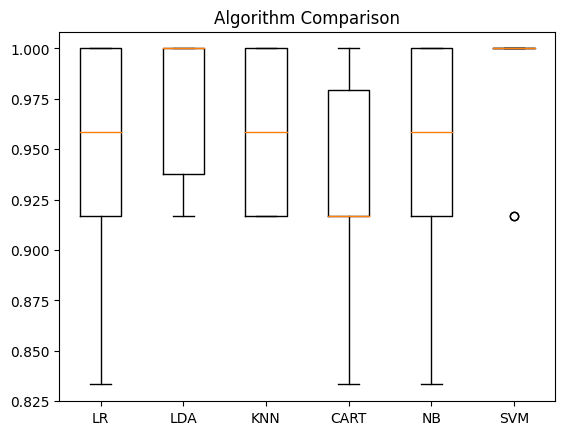

In [21]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.savefig("algComp.jpg")
pyplot.show()